## Observations and Insights 

Top Level Summary:
1. First, without a complete analysis, I would take everything with a grain of salt.  
2. From what I can see, Capomulin and Ramicane were the most effective treatment regimens at reducing the size of the tumor volume.
3. That being said, it looks like they were administered more often then the other drugs, so perhaps the data was skewed a bit.
4. Sex of mice was relatively even, however, further analysis will need to be conducted as to the effectiveness of treatment to both male and female.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice_messydf = len(combined_df["Mouse ID"].unique())
number_mice_messydf

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df.duplicated(["Mouse ID", "Timepoint"])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
number_mice_cleandf = len(clean_df["Mouse ID"].unique())
number_mice_cleandf

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_df = clean_df.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = group_df["Tumor Volume (mm3)"].mean()
median_tumor_volume = group_df["Tumor Volume (mm3)"].median()
variance_tumor_volume = group_df["Tumor Volume (mm3)"].var()
std_tumor_volume = group_df["Tumor Volume (mm3)"].std()
sem_tumor_volume = group_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Variance Tumor Volume": variance_tumor_volume,
    "Standard Deviation (STD) Tumor Volume": std_tumor_volume,
    "Standard Error of Mean (SEM) Tumor Volume": sem_tumor_volume
})
summary_df



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation (STD) Tumor Volume,Standard Error of Mean (SEM) Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
summary_df_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

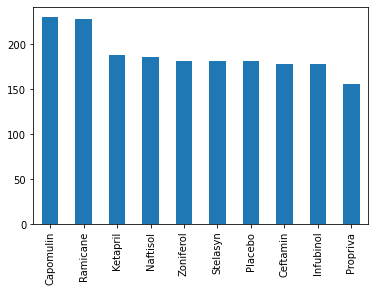

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_measurments_df = clean_df["Drug Regimen"].value_counts()
regimen_measurments_df.plot(kind="bar")

<BarContainer object of 10 artists>

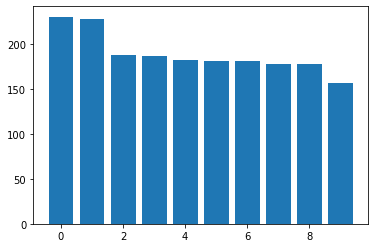

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measurements = clean_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(total_measurements))
plt.bar(x_axis, total_measurements)


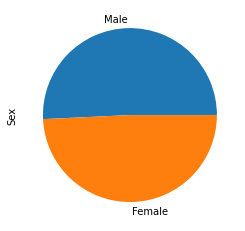

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = clean_df["Sex"].value_counts()
mice_sex.plot(kind="pie")


([<matplotlib.patches.Wedge at 0x16ab4f040a0>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'male'),
  Text(0.025622792083347525, -1.099701537930112, 'female')])

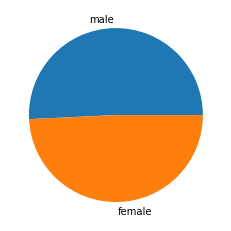

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["male", "female"]
sizes = clean_df["Sex"].value_counts()
colors = ["blue", "orange"]
plt.pie(sizes, labels = labels)


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [13]:
#Take a looksie at Clean DF
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
#Create a new Dataframe that only consists of the top 4 Drug Treatments (Capomulin, Ramicane, Infubinol, and Ceftamin)
top_4_treatments_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_4_treatments_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [15]:
#Sort the top 4 treatments df by Timepoint
top_4_treatments_df = top_4_treatments_df.sort_values(["Timepoint"], ascending=True)
top_4_treatments_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1391,q132,Infubinol,Female,1,30,0,45.0,0
195,i738,Capomulin,Female,23,20,0,45.0,0
205,a520,Ramicane,Male,13,21,0,45.0,0
1370,p438,Ceftamin,Female,11,26,0,45.0,0


In [16]:
last_timepoint_df = top_4_treatments_df.drop_duplicates(subset=["Mouse ID", "Drug Regimen"], keep='last')
last_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1205,m756,Infubinol,Male,19,30,5,47.010364,1
...,...,...,...,...,...,...,...,...
350,v923,Capomulin,Female,19,21,45,40.658124,2
144,m957,Capomulin,Female,3,19,45,33.329098,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = pd.DataFrame(last_tumor_volume["Tumor Volume (mm3)"])
tumor_vol_data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

NameError: name 'last_tumor_volume' is not defined

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
